Data Preprocessing

In [197]:
import pandas as pd
rain = pd.read_csv('./ACC - Rain -Albert Park Acc rainfall_20220818-20230818.csv', parse_dates=['Timestamp'])
rain.head()

,Timestamp,UTC Offset,Multiple Gauge Rainfall Recency Alarm (on/off),Quality,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2
0,2022-08-18 14:20:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
1,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
2,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic
3,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic
4,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic


In [198]:
moist = pd.read_csv('./ACC - Soil Moisture - Mt Albert Grammar Rain_20220818-20230818_5mins.csv', parse_dates=['Timestamp'])
moist.head()

,Timestamp,UTC Offset,Soil Moisture Content (%V/V),Quality
0,2022-08-18 14:25:00,12,NaN,No data available
1,2022-08-18 14:30:00,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available
4,2022-08-18 14:45:00,12,52.1,No quality or non-verified


In [199]:
mtalbert = rain.merge(moist, on='Timestamp')
mtalbert.head()

,Timestamp,UTC Offset_x,Multiple Gauge Rainfall Recency Alarm (on/off),Quality_x,Rainfall (mm),Quality.1,Rainfall (Accumulated) (mm),Quality.2,UTC Offset_y,Soil Moisture Content (%V/V),Quality_y
0,2022-08-18 14:25:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,NaN,No data available
1,2022-08-18 14:30:00,12,NaN,No data available,NaN,No data available,0.0,Automated Process or Synthetic,12,52.1,No quality or non-verified
2,2022-08-18 14:35:00,12,NaN,No data available,2.5,No quality or non-verified,2.5,Automated Process or Synthetic,12,NaN,No data available
3,2022-08-18 14:40:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,NaN,No data available
4,2022-08-18 14:45:00,12,NaN,No data available,NaN,No data available,2.5,Automated Process or Synthetic,12,52.1,No quality or non-verified


In [200]:
mtalbert.drop(columns=['UTC Offset_x', 'Multiple Gauge Rainfall Recency Alarm (on/off)','Quality_x', 'Quality.1', 'Quality.2', 'UTC Offset_y', 'Quality_y'], inplace=True)
mtalbert.head()

,Timestamp,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
0,2022-08-18 14:25:00,NaN,0.0,NaN
1,2022-08-18 14:30:00,NaN,0.0,52.1
2,2022-08-18 14:35:00,2.5,2.5,NaN
3,2022-08-18 14:40:00,NaN,2.5,NaN
4,2022-08-18 14:45:00,NaN,2.5,52.1


In [201]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 2851 non-null    float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  34777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [202]:
print(mtalbert.isnull().sum())


Timestamp                            0
Rainfall (mm)                   102303
Rainfall (Accumulated) (mm)          0
Soil Moisture Content (%V/V)     70377
dtype: int64


In [203]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 2851 non-null    float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  34777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [204]:
print(mtalbert['Rainfall (mm)'].unique())


[ nan  2.5  0.5  1.   3.   1.5  2.   3.5  4.   5.   4.5  8.   6.   5.5
  7.5  6.5  9.  10.   8.5  9.5 11.5  7. ]


In [205]:
mtalbert['Soil Moisture Content (%V/V)'].isna().sum()

70377

In [206]:
# mtalbert['Rainfall (mm)'] = pd.to_numeric(mtalbert['Rainfall (mm)'], errors='coerce')
mtalbert['Rainfall (mm)'] = mtalbert['Rainfall (mm)'].fillna(0)


In [207]:
mtalbert['Soil Moisture Content (%V/V)'] = mtalbert['Soil Moisture Content (%V/V)'].interpolate(method='linear')
mtalbert.isna().sum()

Timestamp                       0
Rainfall (mm)                   0
Rainfall (Accumulated) (mm)     0
Soil Moisture Content (%V/V)    1
dtype: int64

In [208]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105154 entries, 0 to 105153
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Timestamp                     105154 non-null  datetime64[ns]
 1   Rainfall (mm)                 105154 non-null  float64       
 2   Rainfall (Accumulated) (mm)   105154 non-null  float64       
 3   Soil Moisture Content (%V/V)  105153 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 MB


In [209]:
print(mtalbert['Rainfall (mm)'].head())


0    0.0
1    0.0
2    2.5
3    0.0
4    0.0
Name: Rainfall (mm), dtype: float64


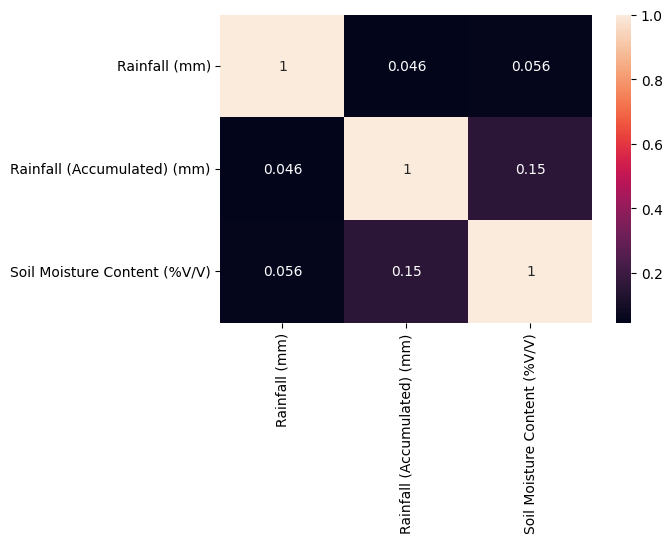

In [210]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Heatmap for correlation between variables
mtalbert = mtalbert.set_index('Timestamp')
# Select only the numeric columns from the 'weather' DataFrame
numeric_columns = mtalbert.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 4))
sns.heatmap(mtalbert.corr(), annot=True)
plt.show()

<Axes: xlabel='Timestamp'>

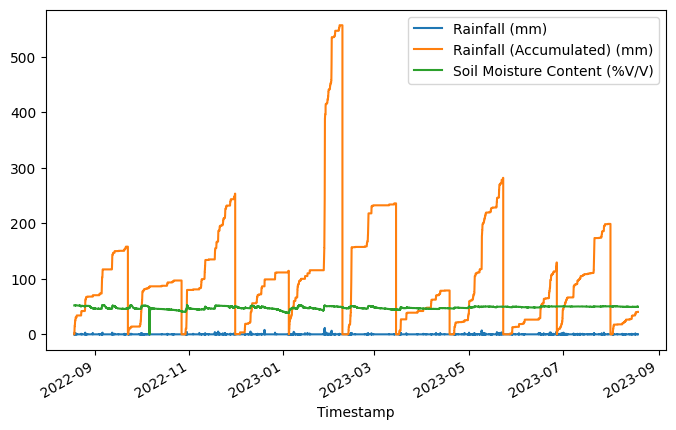

In [211]:
mtalbert.plot(figsize=(8, 5))

In [212]:
mtalbert.describe()

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
count,105154.000000,105154.000000,105153.000000
mean,0.020408,104.130238,48.080289
std,0.184752,99.493476,2.552800
min,0.000000,0.000000,0.000000
25%,0.000000,34.000000,46.488000
50%,0.000000,84.500000,48.294000
75%,0.000000,135.000000,50.136000
max,11.500000,557.000000,52.805000


In [213]:
mtalbert.head()

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
Timestamp,,,
2022-08-18 14:25:00,0.0,0.0,NaN
2022-08-18 14:30:00,0.0,0.0,52.1
2022-08-18 14:35:00,2.5,2.5,52.1
2022-08-18 14:40:00,0.0,2.5,52.1
2022-08-18 14:45:00,0.0,2.5,52.1


In [214]:
mtalbert['Soil Moisture Content (%V/V)'].fillna(mtalbert['Soil Moisture Content (%V/V)'].mean(), inplace=True)
mtalbert.head()

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V)
Timestamp,,,
2022-08-18 14:25:00,0.0,0.0,48.080289
2022-08-18 14:30:00,0.0,0.0,52.100000
2022-08-18 14:35:00,2.5,2.5,52.100000
2022-08-18 14:40:00,0.0,2.5,52.100000
2022-08-18 14:45:00,0.0,2.5,52.100000


# Lag Features

In [215]:
lag_size = 7

# Create lag features for 'Rainfall (mm)'
for i in range(1, lag_size + 1):
    mtalbert[f'Rainfall_lag_{i}'] = mtalbert['Rainfall (mm)'].shift(i)

# Create lag features for 'Rainfall (Accumulated) (mm)'
for i in range(1, lag_size + 1):
    mtalbert[f'Rainfall_Accumulated_lag_{i}'] = mtalbert['Rainfall (Accumulated) (mm)'].shift(i)

# Create lag features for 'Soil Moisture Content (%V/V)'
for i in range(1, lag_size + 1):
    mtalbert[f'Soil_Moisture_lag_{i}'] = mtalbert['Soil Moisture Content (%V/V)'].shift(i)

mtalbert.dropna(inplace=True)  # Drop rows with NaN values in the lag features

# Split Data

In [216]:
print(mtalbert.columns)


Index(['Rainfall (mm)', 'Rainfall (Accumulated) (mm)',
       'Soil Moisture Content (%V/V)', 'Rainfall_lag_1', 'Rainfall_lag_2',
       'Rainfall_lag_3', 'Rainfall_lag_4', 'Rainfall_lag_5', 'Rainfall_lag_6',
       'Rainfall_lag_7', 'Rainfall_Accumulated_lag_1',
       'Rainfall_Accumulated_lag_2', 'Rainfall_Accumulated_lag_3',
       'Rainfall_Accumulated_lag_4', 'Rainfall_Accumulated_lag_5',
       'Rainfall_Accumulated_lag_6', 'Rainfall_Accumulated_lag_7',
       'Soil_Moisture_lag_1', 'Soil_Moisture_lag_2', 'Soil_Moisture_lag_3',
       'Soil_Moisture_lag_4', 'Soil_Moisture_lag_5', 'Soil_Moisture_lag_6',
       'Soil_Moisture_lag_7'],
      dtype='object')


In [217]:
mtalbert.head()

,Rainfall (mm),Rainfall (Accumulated) (mm),Soil Moisture Content (%V/V),Rainfall_lag_1,Rainfall_lag_2,Rainfall_lag_3,Rainfall_lag_4,Rainfall_lag_5,Rainfall_lag_6,Rainfall_lag_7,...,Rainfall_Accumulated_lag_5,Rainfall_Accumulated_lag_6,Rainfall_Accumulated_lag_7,Soil_Moisture_lag_1,Soil_Moisture_lag_2,Soil_Moisture_lag_3,Soil_Moisture_lag_4,Soil_Moisture_lag_5,Soil_Moisture_lag_6,Soil_Moisture_lag_7
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-08-18 15:00:00,0.0,2.5,52.1,0.0,0.0,0.0,0.0,2.5,0.0,0.0,...,2.5,0.0,0.0,52.1,52.1,52.1,52.1,52.1,52.1,48.080289
2022-08-18 15:05:00,0.0,2.5,52.1,0.0,0.0,0.0,0.0,0.0,2.5,0.0,...,2.5,2.5,0.0,52.1,52.1,52.1,52.1,52.1,52.1,52.100000
2022-08-18 15:10:00,0.0,2.5,52.1,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,2.5,2.5,2.5,52.1,52.1,52.1,52.1,52.1,52.1,52.100000
2022-08-18 15:15:00,0.5,3.0,52.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,2.5,2.5,52.1,52.1,52.1,52.1,52.1,52.1,52.100000
2022-08-18 15:20:00,0.0,3.0,52.1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,2.5,2.5,52.1,52.1,52.1,52.1,52.1,52.1,52.100000


In [218]:
from sklearn.model_selection import train_test_split

# Define features and target
X = mtalbert.drop(['Rainfall (mm)', 'Rainfall (Accumulated) (mm)', 'Soil Moisture Content (%V/V)'], axis=1)
y = mtalbert['Rainfall_lag_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
# from sklearn.model_selection import train_test_split

# # Define features and target
# X = mtalbert.drop(['Rainfall (mm)', 'Rainfall (Accumulated) (mm)', 'Soil Moisture Content (%V/V)'], axis=1)
# y = mtalbert['Rainfall (mm)']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [226]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = X.columns

# Sort features based on importance
sorted_idx = feature_importances.argsort()[::-1]

# Print feature importance ranking
print("Feature ranking:")
for f in range(len(sorted_idx)):
    print(f"{f + 1}. Feature '{feature_names[sorted_idx[f]]}' ({feature_importances[sorted_idx[f]]})")


Feature ranking:
1. Feature 'Rainfall_lag_1' (0.9959009622633765)
2. Feature 'Rainfall_lag_3' (0.0010546636015839905)
3. Feature 'Rainfall_lag_2' (0.0010189209988579575)
4. Feature 'Soil_Moisture_lag_7' (0.0003768399008941307)
5. Feature 'Rainfall_lag_7' (0.0002900829225976012)
6. Feature 'Soil_Moisture_lag_2' (0.0002108676551939413)
7. Feature 'Soil_Moisture_lag_3' (0.00016287741950277517)
8. Feature 'Soil_Moisture_lag_4' (0.00014068651664684233)
9. Feature 'Rainfall_lag_6' (0.00011178237696963253)
10. Feature 'Rainfall_Accumulated_lag_4' (0.00011000280776197812)
11. Feature 'Soil_Moisture_lag_6' (0.00010415141803845188)
12. Feature 'Soil_Moisture_lag_1' (8.58597422924609e-05)
13. Feature 'Rainfall_Accumulated_lag_6' (7.372573900308465e-05)
14. Feature 'Rainfall_lag_4' (7.297463080775051e-05)
15. Feature 'Rainfall_Accumulated_lag_2' (5.463411225000892e-05)
16. Feature 'Soil_Moisture_lag_5' (5.4156693466675794e-05)
17. Feature 'Rainfall_Accumulated_lag_7' (5.014090309775774e-05)
18. Fe

In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Make predictions
rf_predictions = rf_model.predict(X_test)
print(f'Random Forest Prediction for tomorrow: {rf_predictions[0]} mm')


# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, rf_predictions)

# Calculate MSE
mse = mean_squared_error(y_test, rf_predictions)

# Calculate R2 score
r2 = r2_score(y_test, rf_predictions)

# Print the metrics
print("Random Foreset Root Mean Squared Error (RMSE):", rmse)
print("Random Foreset Mean Absolute Error (MAE):", mae)
print("Random Foreset Mean Squared Error (MSE):", mse)
print("Random Foreset R2 Score:", r2)

Random Forest Prediction for tomorrow: 0.0 mm
Random Foreset Root Mean Squared Error (RMSE): 0.006874754134712289
Random Foreset Mean Absolute Error (MAE): 8.915834522111266e-05
Random Foreset Mean Squared Error (MSE): 4.7262244412743715e-05
Random Foreset R2 Score: 0.9985597518360375


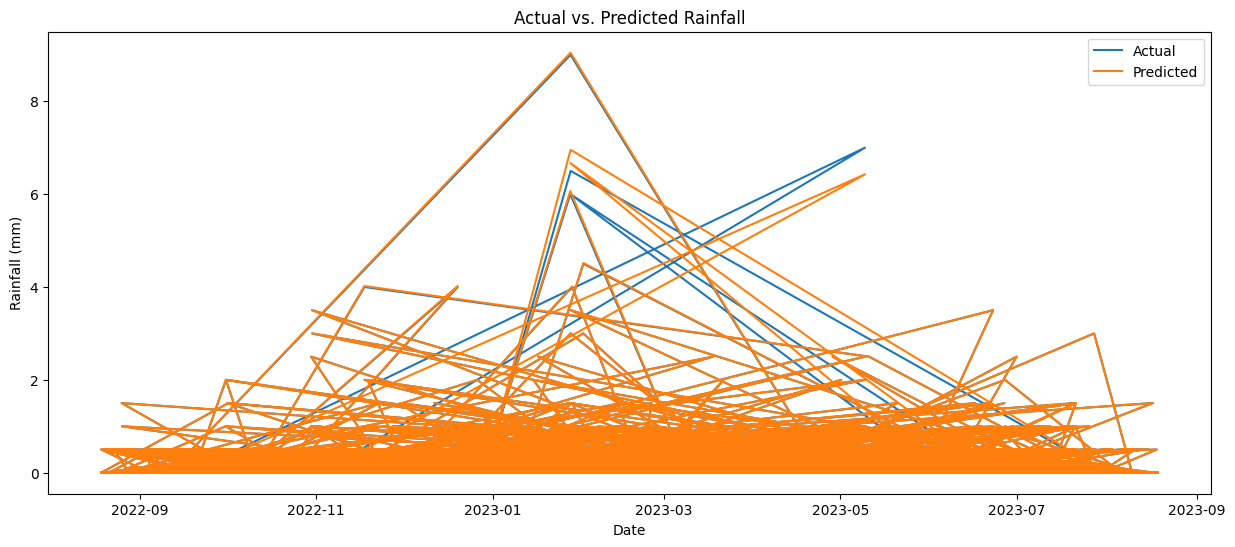

In [228]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, rf_predictions, label='Predicted')
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

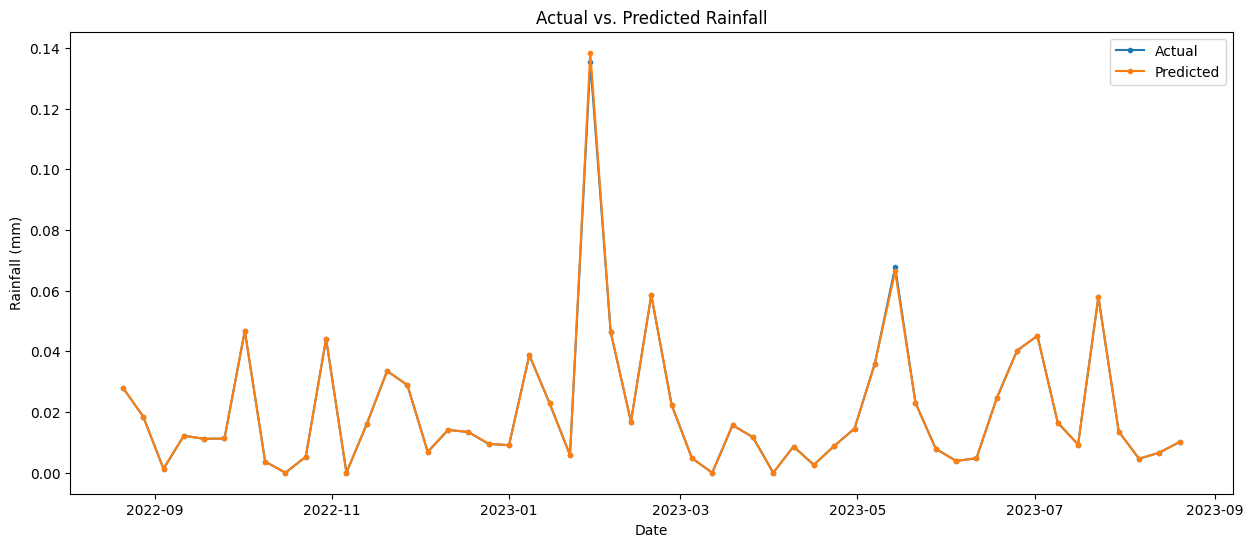

In [229]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions}, index=X_test.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Rainfall')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall (mm)')
ax.legend()

plt.show()

In [230]:
result_df.head()

,Actual,Predicted
Timestamp,,
2023-04-19 20:05:00,0.0,0.0
2023-01-16 03:40:00,0.0,0.0
2022-11-22 20:05:00,0.0,0.0
2023-01-03 07:00:00,0.0,0.0
2023-07-21 08:20:00,0.0,0.0


In [237]:
# Calculate monthly median rainfall
monthly_median_rainfall = mtalbert.groupby(mtalbert.index.month)['Rainfall (mm)'].median()

# Calculate the percentage of actual rainfall compared to the monthly median
mtalbert['rainfall_percentage'] = (mtalbert['Rainfall (mm)'] / monthly_median_rainfall[mtalbert.index.month].values) * 100

# Create a function to categorize the weather conditions
def categorize_rainfall_condition(percentage):
    if percentage > 200:
        return "Very wet"
    elif percentage > 110:
        return "Moderately wet"
    elif percentage > 90:
        return "Near normal"
    elif percentage > 50:
        return "Moderately dry"
    else:
        return "Very dry"

# Apply the categorization function to create a new column with the weather condition
mtalbert['weather_condition'] = mtalbert['rainfall_percentage'].apply(categorize_rainfall_condition)

# Print the resulting dataframe with weather conditions
print(mtalbert[['Rainfall (mm)', 'rainfall_percentage', 'weather_condition']])

                     Rainfall (mm)  rainfall_percentage weather_condition
Timestamp                                                                
2022-08-18 15:00:00            0.0                  NaN          Very dry
2022-08-18 15:05:00            0.0                  NaN          Very dry
2022-08-18 15:10:00            0.0                  NaN          Very dry
2022-08-18 15:15:00            0.5                  inf          Very wet
2022-08-18 15:20:00            0.0                  NaN          Very dry
...                            ...                  ...               ...
2023-08-18 14:00:00            0.0                  NaN          Very dry
2023-08-18 14:05:00            0.0                  NaN          Very dry
2023-08-18 14:10:00            0.0                  NaN          Very dry
2023-08-18 14:15:00            0.0                  NaN          Very dry
2023-08-18 14:20:00            0.0                  NaN          Very dry

[105147 rows x 3 columns]
